In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

## Some plots:

### Single variable analysis

All columns one at a time, duh

### bivariate analysis

1. Pets on had failure
2. pets on type of failure
3. pets on time to failure
4. Pets on usage time

5. Carpet score on had failure
6. Carpet score on type of failure
7. Carpet score on time to failure
8. Carpet score on usage time

9. Type of failure and time to failure
10. Type of failure and usage time

### Multivariate analysis

Now this is gon be a mix and max n see what's up.


In [2]:
df = pd.read_csv(
    "/Users/paniket/TU_Eindhoven/2_Study/Q1_2AMS11_survival_Statistics_for_Data_Scientists/2_Assignments/group/Group_54_2AMS11_Assignment/output/data_cleaned.csv"
)


df["registration_date"] = pd.to_datetime(df["registration_date"])
df["failure_date"] = pd.to_datetime(df["failure_date"])

df["registration_month"] = pd.to_datetime(df["registration_date"]).dt.month
df["registration_year"] = pd.to_datetime(df["registration_date"]).dt.year
df["failure_month"] = pd.to_datetime(df["failure_date"]).dt.month
df["failure_year"] = pd.to_datetime(df["failure_date"]).dt.year

# We dont really need the 3 status columns, we added strings for that, ezpz
df = df[
    [
        "registration_date",
        "total_usage_time",
        "pets",
        "carpet_score",
        "sent_for_repair",
        "failure_date",
        "had_failure",
        "time_to_failure",
        "type_of_failure",
        "registration_month",
        "registration_year",
        "failure_month",
        "failure_year",
    ]
]

df_failed = df.loc[df["had_failure"] == 1]

In [3]:
df

registration_date  total_usage_time  pets  carpet_score  sent_for_repair  \
0           2015-01-01               262     0             1                1   
1           2015-01-01              2003     0             2                1   
2           2015-01-01              2454     1             4                1   
3           2015-01-01               987     0             2                0   
4           2015-01-02              1472     0             1                1   
...                ...               ...   ...           ...              ...   
5382        2019-12-30                 1     0             5                0   
5383        2019-12-30                 1     0             1                0   
5384        2019-12-31                 0     1             1                0   
5385        2019-12-31                 0     0             3                0   
5386        2019-12-31                 0     1             2                0   

     failure_date  had_failure  time_to_failure     type_of_failure  \
0      2015-10-23            1              295                  Ir   
1      2019-12-18            1             1812   Unknown_Component   
2      2018-11-28            1             1427  Battery_and_Impact   
3      1970-01-01            0               -1            Censored   
4      2019-12-07            1             1800             Battery   
...           ...          ...              ...                 ...   
5382   1970-01-01            0               -1            Censored   
5383   1970-01-01            0               -1            Censored   
5384   1970-01-01            0               -1            Censored   
5385   1970-01-01            0               -1            Censored   
5386   1970-01-01            0               -1            Censored   

      registration_month  registration_year  failure_month  failure_year  
0                      1               2015             10          2015  
1                      1               2015             12          2019  
2                      1               2015             11          2018  
3                      1               2015              1          1970  
4                      1               2015             12          2019  
...                  ...                ...            ...           ...  
5382                  12               2019              1          1970  
5383                  12               2019              1          1970  
5384                  12               2019              1          1970  
5385                  12               2019              1          1970  
5386                  12               2019              1          1970  

[5387 rows x 13 columns]

##### Analysis of time columns


In [4]:
for column in [
    "registration_date",
    "registration_month",
    "registration_year",
    "failure_date",
    "failure_month",
    "failure_year",
]:
    print(column)
    print("\nEntire Dataframe")
    fig = px.histogram(df, x=column, nbins=60, title=f"Distribution of {column}")
    fig.update_xaxes(title_text=column.upper())
    fig.update_yaxes(title_text="Count")
    fig.show()
    print()
    print("Failed Dataframe")
    fig = px.histogram(df_failed, x=column, nbins=60, title=f"Distribution of {column}")
    fig.update_xaxes(title_text=column.upper())
    fig.update_yaxes(title_text="Count")
    fig.show()

    #  # Dis is forever 1970 :p
    # print()
    # print("Censored Dataframe")
    # fig = px.histogram(df.loc[df["had_failure"] == 0], x=column, nbins=60,
    #                title=f'Distribution of {column}')
    # fig.update_xaxes(title_text=column.upper())
    # fig.update_yaxes(title_text='Count')
    # fig.show()

registration_date

Entire Dataframe



Failed Dataframe


registration_month

Entire Dataframe



Failed Dataframe


registration_year

Entire Dataframe



Failed Dataframe


failure_date

Entire Dataframe



Failed Dataframe


failure_month

Entire Dataframe



Failed Dataframe


failure_year

Entire Dataframe



Failed Dataframe


Dist of usage time


In [5]:
fig = px.histogram(
    df, x="total_usage_time", nbins=200, title="Distribution of Total Usage Time"
)
fig.update_xaxes(title_text="Total Usage Time")
fig.update_yaxes(title_text="Count")
fig.show()

Dist of pets - Sadge such lil peeps have pets :(


In [ ]:
pet_counts = df["pets"].value_counts().sort_index()
fig = px.bar(
    x=pet_counts.index,
    y=pet_counts.values,
    title="Distribution of Pet Ownership",
    labels={"x": "Has Pets", "y": "Count"},
)
fig.update_xaxes(ticktext=["No", "Yes"], tickvals=[0, 1])
fig.show()

Dist of carpet scores


In [7]:
carpet_counts = df["carpet_score"].value_counts().sort_index()
fig = px.bar(
    x=carpet_counts.index,
    y=carpet_counts.values,
    title="Distribution of Carpet Scores",
    labels={"x": "Carpet Score", "y": "Count"},
)
fig.show()

Devices to repaie - Usually if the had failure. We did check and ALL devices that had failure were sent for repair.


In [8]:
# repair_counts = df['sent_for_repair'].value_counts().sort_index()
# fig = px.bar(x=repair_counts.index, y=repair_counts.values,
#              title='Distribution of Devices Sent for Repair',
#              labels={'x': 'Sent for Repair', 'y': 'Count'})
# fig.update_xaxes(ticktext=['No', 'Yes'], tickvals=[0, 1])
# fig.show()

Dist of had failure


In [9]:
failure_counts = df["had_failure"].value_counts().sort_index()
fig = px.bar(
    x=failure_counts.index,
    y=failure_counts.values,
    title="Distribution of Device Failures",
    labels={"x": "Had Failure", "y": "Count"},
)
fig.update_xaxes(ticktext=["No", "Yes"], tickvals=[0, 1])
fig.show()

Dist of time to failure


In [ ]:
fig = px.histogram(
    df_failed,
    x="time_to_failure",
    nbins=200,
    title="Distribution of Time to Failure",
    width=1100,
    height=600,
)
fig.update_xaxes(title_text="Time to Failure (days)")
fig.update_yaxes(title_text="Count")
fig.show()

In [11]:
fig = px.box(
    df_failed,
    x="time_to_failure",
    title="Distribution of Time to Failure",
    width=1100,
    height=600,
)
fig.update_xaxes(title_text="Time to Failure (days)")
fig.update_yaxes(title_text="Count")
fig.show()

Dist of failure types


In [12]:
failure_type_counts = df_failed["type_of_failure"].value_counts()
fig = px.bar(
    x=failure_type_counts.index,
    y=failure_type_counts.values,
    title="Distribution of Failure Types",
    labels={"x": "Failure Type", "y": "Count"},
)
fig.update_xaxes(tickangle=45)
fig.show()

In [13]:
import plotly.express as px

# Calculate the counts of each failure type
failure_type_counts = df_failed["type_of_failure"].value_counts()
counts = failure_type_counts.sum()
# Create the bar chart with text labels on top of the bars
fig = px.bar(
    x=failure_type_counts.index,
    y=failure_type_counts.values,
    title="Distribution of Failure Types",
    labels={"x": "Failure Type", "y": "Count"},
    text=failure_type_counts.values  # Add the counts as text labels
)

# Update the position of the text labels to be on top of the bars
fig.update_traces(textposition='outside')

# Rotate x-axis labels if needed
fig.update_xaxes(tickangle=45)

# Add padding to the y-axis to prevent cropping
y_max = failure_type_counts.max() * 1.2  # Add 10% padding to the maximum value
fig.update_yaxes(range=[0, y_max])

# Show the figure
fig.show()


In [14]:
import plotly.express as px

# Calculate the counts of each failure type
failure_type_counts = df_failed["type_of_failure"].value_counts()

# Calculate the total number of failures
total_failures = failure_type_counts.sum()

# Create the bar chart with text labels on top of the bars
fig = px.bar(
    x=failure_type_counts.index,
    y=failure_type_counts.values,
    title="Distribution of Failure Types",  # Regular title
    labels={"x": "Failure Type", "y": "Count"},
    text=failure_type_counts.values  # Add the counts as text labels
)

# Update the position of the text labels to be on top of the bars
fig.update_traces(textposition='outside')

# Rotate x-axis labels if needed
fig.update_xaxes(tickangle=45)

# Add padding to the y-axis to prevent cropping
y_max = failure_type_counts.max() * 1.2  # Add 10% padding to the maximum value
fig.update_yaxes(range=[0, y_max])

# Add the total number of failures as an annotation
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.98, y=1.2,
    text=f"Total Failures: {total_failures}",
    showarrow=False,
    font=dict(size=12)
)

# Show the figure
fig.show()


Failure rate against registration month.


In [15]:
# # meh. Looks baout the same.

# failure_rate = df.groupby(['registration_month', 'pets'])['had_failure'].mean().reset_index()

# fig = px.line(failure_rate, x='registration_month', y='had_failure', color='pets',
#               title='Failure Rate by Registration Month and Pet Ownership',
#               labels={'registration_month': 'Month', 'had_failure': 'Failure Rate', 'pets': 'Has Pets'},
#               line_shape='spline')
# fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# fig.show()

Carpet score against time to failure. Big bubble = more failures. This graph sucks


In [16]:
# # Idk what I was lookin for lol

# df_failed = df_failed
# df_failed['failure_count'] = df_failed.groupby(['carpet_score', 'type_of_failure'])['had_failure'].transform('count')

# fig = px.scatter(df_failed, x='carpet_score', y='time_to_failure',
#                  size='failure_count', color='type_of_failure',
#                  hover_name='type_of_failure', size_max=60,
#                  title='Carpet Score vs. Time to Failure',
#                  labels={'carpet_score': 'Carpet Score', 'time_to_failure': 'Time to Failure (days)', 'failure_count': 'Number of Failures'})
# fig.show()

Impact of pets against type of failure


In [17]:
fig = px.box(
    df_failed,
    x="type_of_failure",
    y="total_usage_time",
    color="pets",
    notched=True,
    title="Usage Time Distribution by Failure Type and Pet Ownership",
    labels={
        "type_of_failure": "Failure Type",
        "total_usage_time": "Total Usage Time",
        "pets": "Has Pets",
    },
)
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [18]:
result = df.groupby(["type_of_failure", "pets"]).size().unstack(fill_value=0)

# Display the result
print(result)

pets                   0     1
type_of_failure               
Battery              423   401
Battery_and_Impact     0     2
Censored            2916  1250
Impact                16   112
Ir                   152    76
Unknown_Component     31     8


In [19]:
df_grouped = df.groupby(["type_of_failure", "pets"]).size().reset_index(name="count")

# Create the Plotly bar chart
fig = px.bar(
    df_grouped,
    x="type_of_failure",
    y="count",
    color="pets",
    barmode="group",
    title="Count of Pets and No Pets by Type of Failure",
    width=1100,
    height=600,
)

# Show the plot
fig.show()

In [20]:
df_grouped = (
    df_failed.groupby(["type_of_failure", "pets"]).size().reset_index(name="count")
)

fig = px.bar(
    df_grouped,
    x="type_of_failure",
    y="count",
    color="pets",
    barmode="group",
    title="Count of Pets and No Pets by Type of Failure - Without censoring",
    width=1100,
    height=600,
)

fig.show()

In [21]:
import plotly.express as px

# Sample data (assuming df_failed exists with type_of_failure and pets columns)
df_grouped = df_failed.groupby(["type_of_failure", "pets"]).size().reset_index(name="count")

# Calculate the sum of counts for each type_of_failure
df_sum = df_grouped.groupby("type_of_failure")["count"].sum().reset_index(name="total_count")

# Merge the sums back to the main dataframe for annotation purposes
df_grouped = df_grouped.merge(df_sum, on="type_of_failure")

# Create the grouped bar chart (double bar for each type_of_failure)
fig = px.bar(
    df_grouped,
    x="type_of_failure",
    y="count",
    color="pets",
    barmode="group",  # Side-by-side bars
    title="Count of Pets and No Pets by Type of Failure",
    width=1100,
    height=600,
    labels={"count": "Count", "type_of_failure": "Type of Failure", "pets": "Pets"},
)

# Add the total count above each pair of bars for each type_of_failure
for type_of_failure in df_sum["type_of_failure"]:
    total_count = df_sum.loc[df_sum["type_of_failure"] == type_of_failure, "total_count"].values[0]
    fig.add_annotation(
        x=type_of_failure,
        y=total_count + 5,  # Add a little buffer to prevent overlap with bar
        text=f"Total: {total_count}",
        showarrow=False,
        font=dict(size=12, color="black"),
    )

# Add custom text labels for the counts, handling small bar cases
for i, row in df_grouped.iterrows():
    bar_height = row["count"]
    type_of_failure = row["type_of_failure"]
    pets = row["pets"]

    # If the bar is very small, place the label outside the bar (above it)
    y_position = bar_height if bar_height > 5 else bar_height + 5  # Shift label for small bars

    fig.add_annotation(
        x=type_of_failure,
        y=y_position,
        text=str(bar_height),
        showarrow=False,
        font=dict(size=12, color="black"),
        align="center",
        bgcolor="white" if bar_height < 5 else None  # Add white background for tiny bars
    )

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Add padding to ensure small bar labels are visible
fig.update_layout(
    margin=dict(t=50, b=50),  # Adjust top and bottom margins
    yaxis=dict(range=[0, df_grouped["count"].max() + 20])  # Add padding to y-axis
)

# Show the plot
fig.show()


Type of failure against failure year over time


In [22]:
failure_prop = (
    df_failed.groupby(["failure_year", "type_of_failure"]).size().unstack(fill_value=0)
)
failure_prop = failure_prop.div(failure_prop.sum(axis=1), axis=0)

fig = px.area(
    failure_prop,
    title="Proportion of Failure Types Over Time",
    labels={"value": "Proportion of Failures", "failure_year": "Year"},
)
fig.update_yaxes(range=[0, 1])
fig.show()

Multivariate analysis - I am sorry I underestimated you


In [23]:
# # Why tf is the documentation so hard man. I hate this

# fig = px.scatter_3d(df_failed, x='total_usage_time', y='time_to_failure', z='carpet_score',
#                     color='type_of_failure', size='pets',
#                     title='Usage Time vs. Time to Failure vs. Carpet Score',
#                     labels={'total_usage_time': 'Total Usage Time',
#                             'time_to_failure': 'Time to Failure (days)',
#                             'carpet_score': 'Carpet Score',
#                             'type_of_failure': 'Failure Type',
#                             'pets': 'Has Pets'}, width = 1100, height = 750)
# fig.show()

Time to failure from date of registration


In [24]:
fig = px.scatter(
    df_failed,
    x="registration_date",
    y="time_to_failure",
    color="type_of_failure",
    title="Registration Date vs Time to Failure",
    labels={
        "registration_date": "Registration Date",
        "time_to_failure": "Time to Failure (days)",
        "type_of_failure": "Type of Failure",
    },
)
fig.show()

Box of the above


In [25]:
fig = px.box(
    df_failed,
    x="registration_year",
    y="time_to_failure",
    title="Time to Failure by Registration Year",
    labels={
        "registration_year": "Registration Year",
        "time_to_failure": "Time to Failure (days)",
    },
)
fig.show()

Same but with failure date lul


In [26]:
fig = px.scatter(
    df_failed,
    x="registration_date",
    y="failure_date",
    color="type_of_failure",
    title="Registration Date vs Failure Date",
    labels={
        "registration_date": "Registration Date",
        "failure_date": "Failure Date",
        "type_of_failure": "Type of Failure",
    },
)
fig.add_trace(
    px.line(
        x=[df["registration_date"].min(), df["registration_date"].max()],
        y=[df["registration_date"].min(), df["registration_date"].max()],
    ).data[0]
)
fig.show()

Average time to failure by month - I thought they fail more in some months.


In [27]:
avg_time_to_failure = (
    df_failed.groupby("registration_month")["time_to_failure"].mean().reset_index()
)

fig = px.bar(
    avg_time_to_failure,
    x="registration_month",
    y="time_to_failure",
    title="Average Time to Failure by Registration Month",
    labels={
        "registration_month": "Registration Month",
        "time_to_failure": "Average Time to Failure (days)",
    },
)
fig.update_xaxes(
    tickmode="array",
    tickvals=list(range(1, 13)),
    ticktext=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
fig.show()

Pair plot cuz ez.


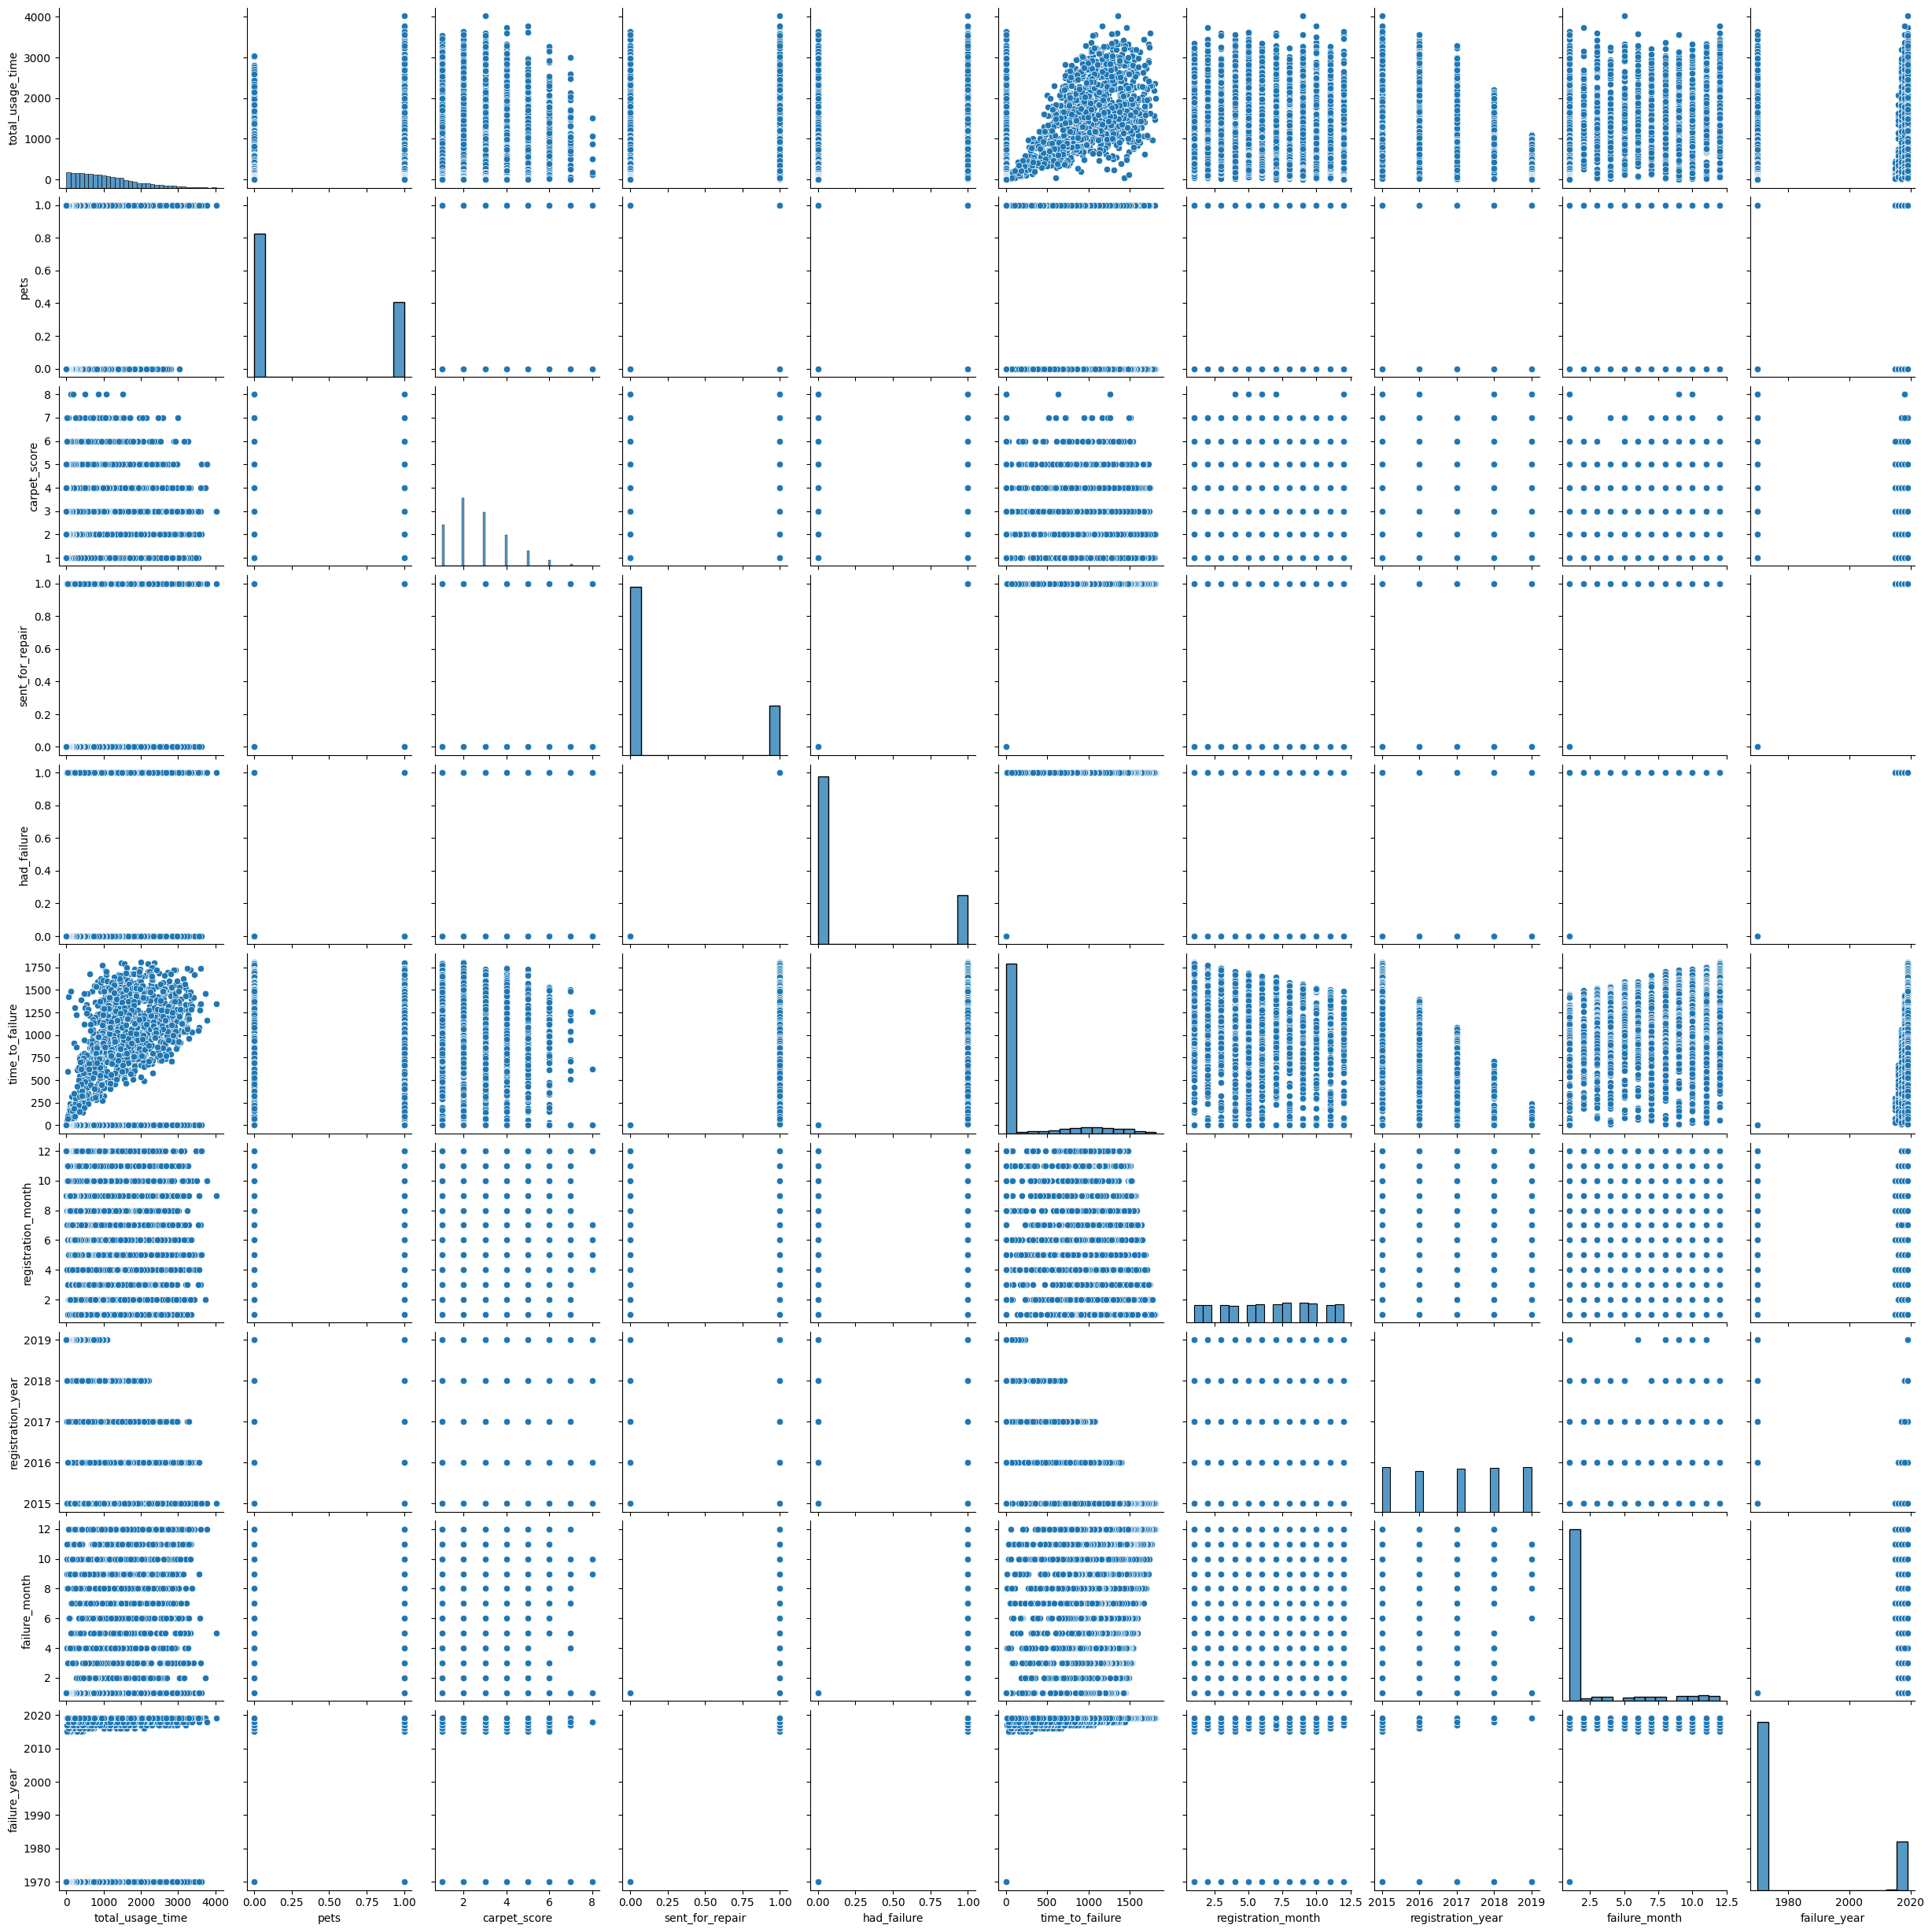

In [28]:
sns.pairplot(data=df)

Correlation of all numerical variables (Ignore statuses)


In [29]:
numerical_cols = [
    "total_usage_time",
    "pets",
    "carpet_score",
    "had_failure",
    "time_to_failure",
]
corr_matrix = df[numerical_cols].corr()

fig = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale="RdBu",
        zmin=-1,
        zmax=1,
    )
)

fig.update_layout(title="Correlation Heatmap of Numerical Variables")
fig.show()

Failure rate over time


In [30]:
failure_rate = df.groupby("registration_year")["had_failure"].mean()

fig = px.line(
    x=failure_rate.index,
    y=failure_rate.values,
    labels={"x": "Registration Year", "y": "Failure Rate"},
    title="Failure Rate by Registration Year",
)
fig.show()

time to failure by failure type


In [31]:
fig = px.violin(
    df_failed,
    y="time_to_failure",
    x="type_of_failure",
    box=True,
    points="all",
    title="Distribution of Time to Failure by Failure Type",
)
fig.update_xaxes(tickangle=45)
fig.show()

usage time vs time to failure


In [32]:
fig = px.scatter(
    df_failed,
    x="total_usage_time",
    y="time_to_failure",
    color="type_of_failure",
    hover_data=["pets", "carpet_score"],
    title="Usage Time vs. Time to Failure",
)
fig.show()

failure type over time


In [33]:
failure_counts = (
    df_failed.groupby(["failure_year", "type_of_failure"]).size().unstack(fill_value=0)
)

fig = px.area(failure_counts, title="Failure Types Over Time")
fig.update_layout(xaxis_title="Failure Year", yaxis_title="Number of Failures")
fig.show()

# bivariate - 1-10


1


In [34]:
fig = px.histogram(
    df,
    x="pets",
    color="had_failure",
    barmode="group",
    title="Distribution of Failures by Pet Ownership",
    labels={"pets": "Pets (0: No, 1: Yes)", "had_failure": "Had Failure"},
)
fig.show()

2


In [35]:
fig = px.histogram(
    df_failed,
    x="pets",
    color="type_of_failure",
    barmode="group",
    title="Distribution of Failure Types by Pet Ownership",
    labels={"pets": "Pets (0: No, 1: Yes)", "type_of_failure": "Type of Failure"},
)
fig.show()

3


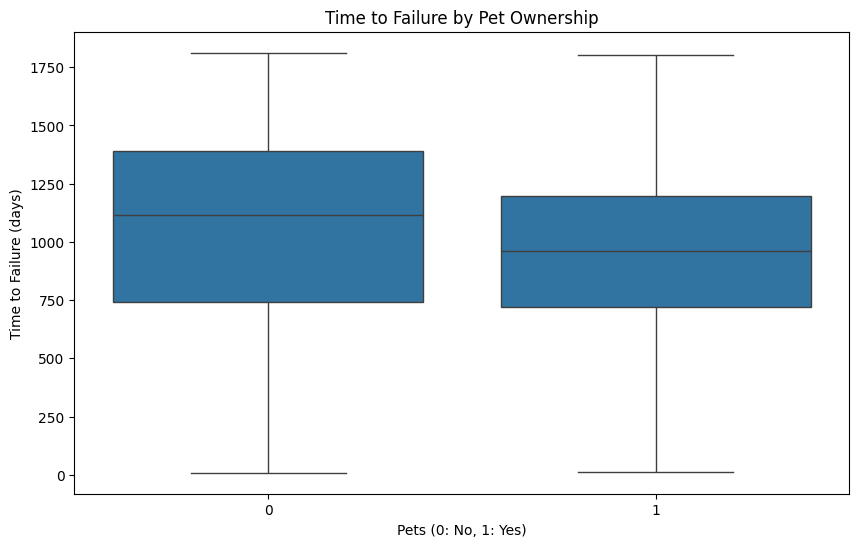

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="pets", y="time_to_failure", data=df_failed)
plt.title("Time to Failure by Pet Ownership")
plt.xlabel("Pets (0: No, 1: Yes)")
plt.ylabel("Time to Failure (days)")
plt.show()

In [37]:
fig = px.box(
    df_failed,
    x="pets",
    y="time_to_failure",
    title="Time to Failure by Pet Ownership",
    labels={
        "pets": "Pets (0: No, 1: Yes)",
        "time_to_failure": "Time to Failure (days)",
    },
)
fig.show()

4


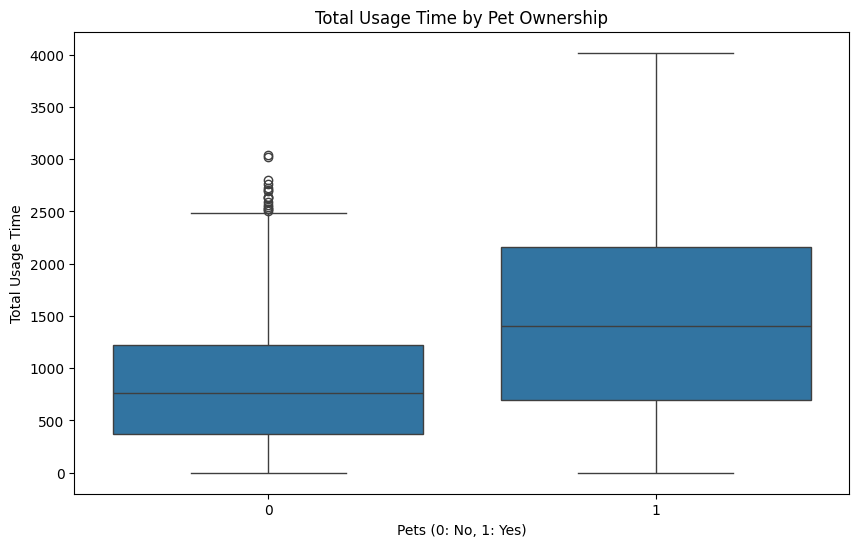

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="pets", y="total_usage_time", data=df)
plt.title("Total Usage Time by Pet Ownership")
plt.xlabel("Pets (0: No, 1: Yes)")
plt.ylabel("Total Usage Time")
plt.show()

In [39]:
fig = px.box(
    df,
    x="pets",
    y="total_usage_time",
    title="Total Usage Time by Pet Ownership",
    labels={"pets": "Pets (0: No, 1: Yes)", "total_usage_time": "Total Usage Time"},
    width=1250,
    height=850,
)
fig.show()

5


In [40]:
fig = px.histogram(
    df,
    x="carpet_score",
    color="had_failure",
    barmode="group",
    title="Distribution of Failures by Carpet Score",
    labels={"carpet_score": "Carpet Score", "had_failure": "Had Failure"},
)
fig.show()

6


In [41]:
fig = px.histogram(
    df_failed,
    x="carpet_score",
    color="type_of_failure",
    barmode="group",
    title="Distribution of Failure Types by Carpet Score",
    labels={"carpet_score": "Carpet Score", "type_of_failure": "Type of Failure"},
)
fig.show()

7


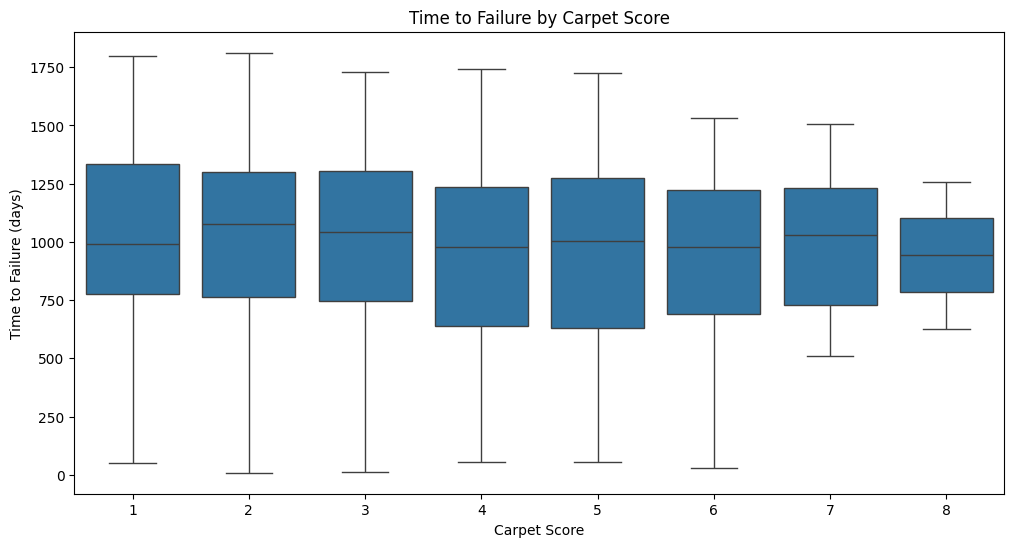

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="carpet_score", y="time_to_failure", data=df_failed)
plt.title("Time to Failure by Carpet Score")
plt.xlabel("Carpet Score")
plt.ylabel("Time to Failure (days)")
plt.show()

In [43]:
fig = px.box(
    df_failed,
    x="carpet_score",
    y="time_to_failure",
    title="Time to Failure by Carpet Score",
    labels={
        "carpet_score": "Carpet Score",
        "time_to_failure": "Time to Failure (days)",
    },
    width=1100,
    height=850,
)
fig.show()

8


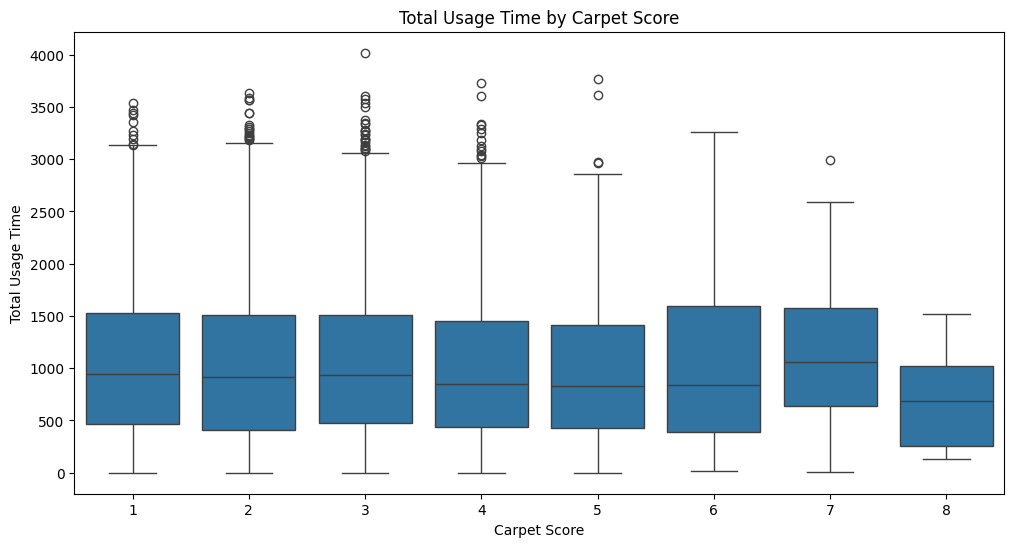

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="carpet_score", y="total_usage_time", data=df)
plt.title("Total Usage Time by Carpet Score")
plt.xlabel("Carpet Score")
plt.ylabel("Total Usage Time")
plt.show()

In [45]:
fig = px.box(
    df,
    x="carpet_score",
    y="total_usage_time",
    title="Total Usage Time by Carpet Score",
    labels={"carpet_score": "Carpet Score", "total_usage_time": "Total Usage Time"},
    width=1100,
    height=850,
)
fig.show()

9


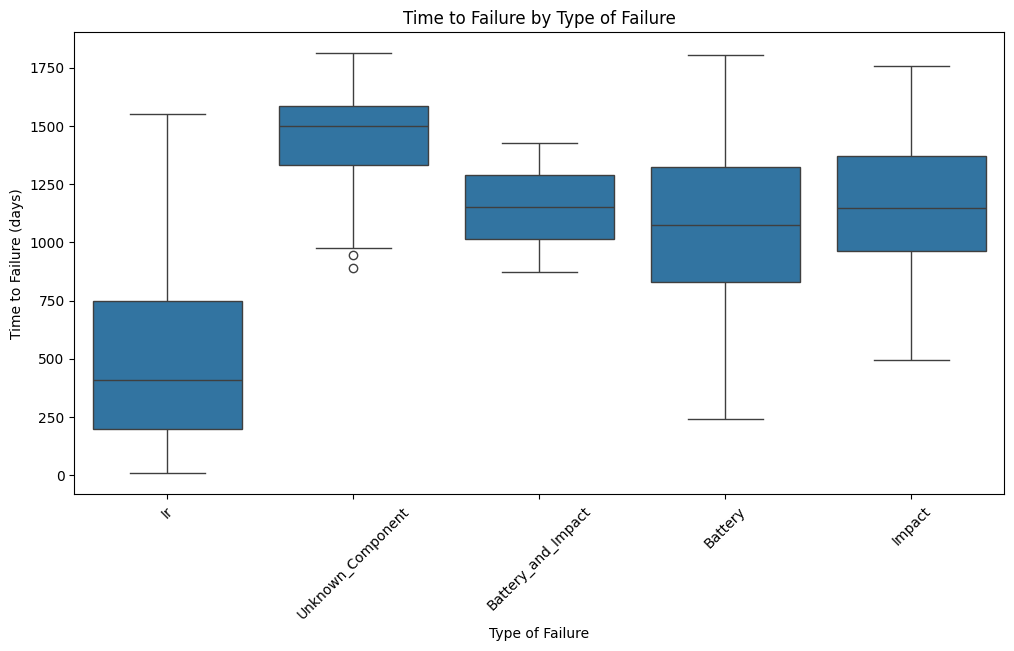

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="type_of_failure", y="time_to_failure", data=df_failed)
plt.title("Time to Failure by Type of Failure")
plt.xlabel("Type of Failure")
plt.ylabel("Time to Failure (days)")
plt.xticks(rotation=45)
plt.show()

In [47]:
fig = px.box(
    df_failed,
    x="type_of_failure",
    y="time_to_failure",
    title="Time to Failure by Type of Failure",
    labels={
        "type_of_failure": "Type of Failure",
        "time_to_failure": "Time to Failure (days)",
    },
    width=1100,
    height=850,
)
fig.update_xaxes(tickangle=45)
fig.show()

10


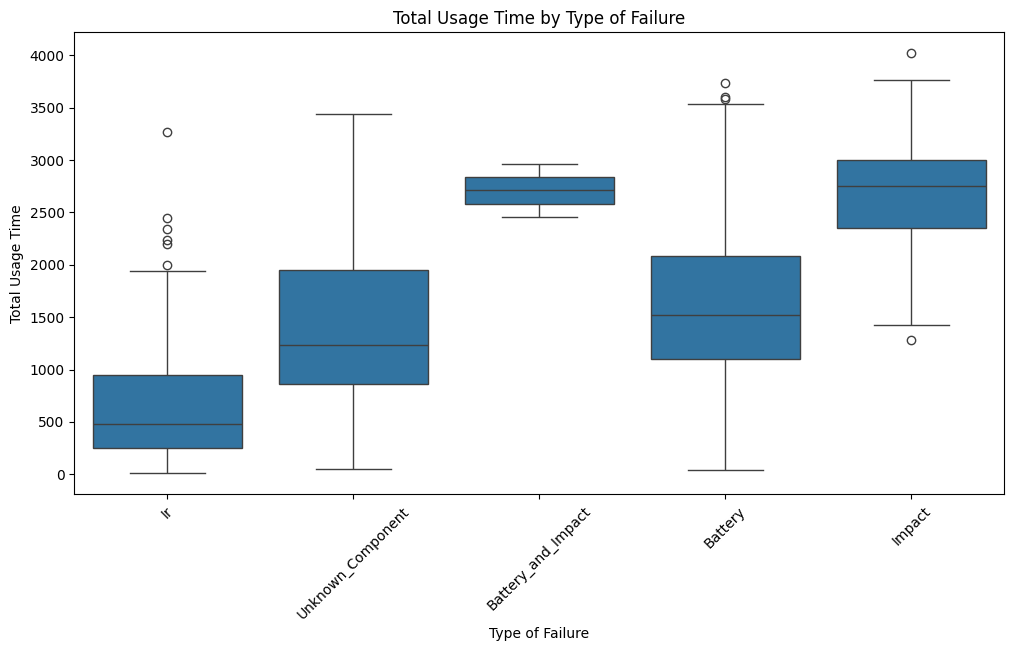

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="type_of_failure", y="total_usage_time", data=df_failed)
plt.title("Total Usage Time by Type of Failure")
plt.xlabel("Type of Failure")
plt.ylabel("Total Usage Time")
plt.xticks(rotation=45)
plt.show()

In [49]:
fig = px.box(
    df_failed,
    x="type_of_failure",
    y="total_usage_time",
    title="Total Usage Time by Type of Failure",
    labels={
        "type_of_failure": "Type of Failure",
        "total_usage_time": "Total Usage Time",
    },
    width=1100,
    height=850,
)
fig.update_xaxes(tickangle=45)
fig.show()

### Checking distribution of type of failures - Including and excluding censored data


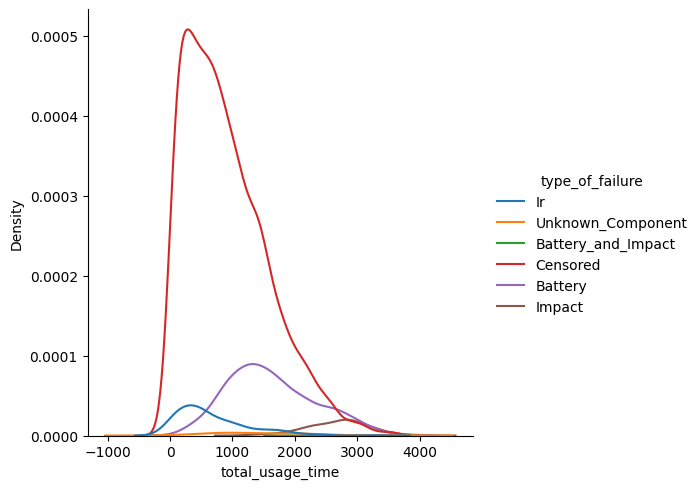

In [50]:
sns.displot(data=df, x="total_usage_time", kind="kde", hue="type_of_failure")

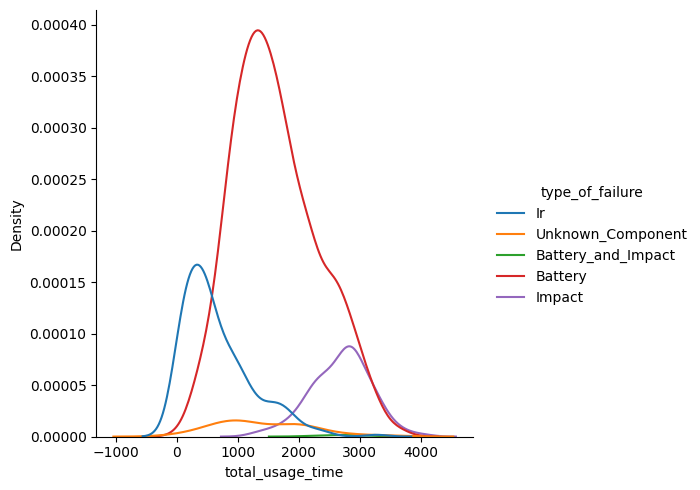

In [51]:
sns.displot(data=df_failed, x="total_usage_time", kind="kde", hue="type_of_failure")
# sns.displot(data=df_failed, x='total_usage_time', kind='hist')

In [52]:
fig = px.histogram(
    df_failed,
    x="total_usage_time",
    title="Distribution of Total Usage Time",
    marginal="box",
    color="type_of_failure",
    width=1300,
    height=900,
)
fig.update_layout(xaxis_title="Total Usage Time", yaxis_title="Count of usage time")
fig.show()

In [53]:
fig = px.histogram(
    df_failed,
    x="carpet_score",
    title="Distribution of Carpet Score",
    marginal="box",
    color="type_of_failure",
    width=1300,
    height=900,
)
fig.update_layout(xaxis_title="Carpet Score", yaxis_title="Count of Carpet Score")
fig.show()

In [54]:
# sns.pairplot(df)

In [55]:
# sns.pairplot(df_failed)

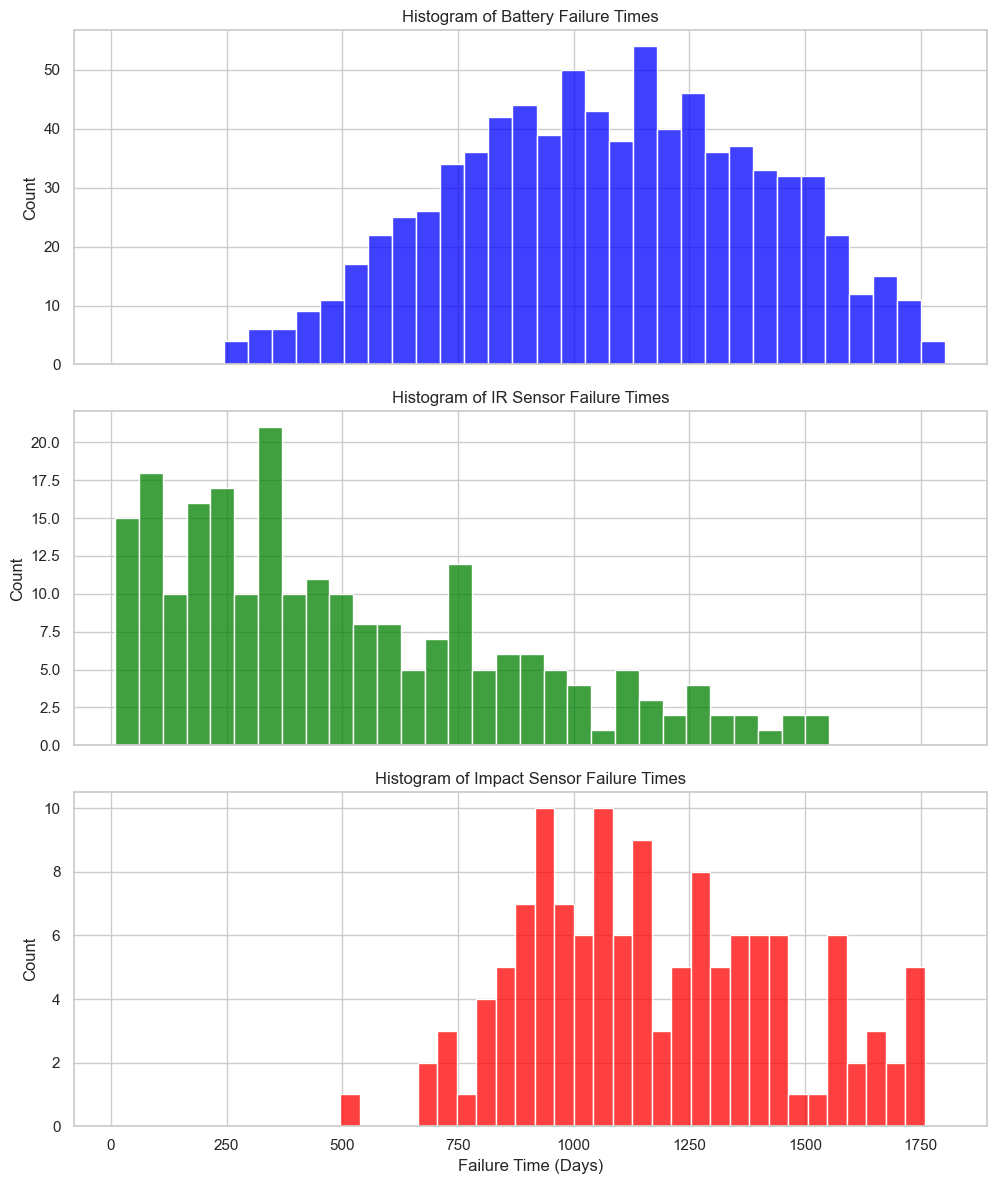

In [56]:
# Assuming your dataframe is named df
# Filter out censored data, i.e., rows where time_to_failure is -1
df_filtered = df[df['time_to_failure'] != -1]

# Separate out the failures by type
battery_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Battery")]
ir_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Ir")]
impact_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Impact")]

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot the histogram for Battery failures
sns.histplot(battery_failures['time_to_failure'], bins=30, kde=False, color='blue', ax=axes[0])
axes[0].set_title('Histogram of Battery Failure Times')
axes[0].set_xlabel('Failure Time (Days)')
axes[0].set_ylabel('Count')

# Plot the histogram for IR Sensor failures
sns.histplot(ir_failures['time_to_failure'], bins=30, kde=False, color='green', ax=axes[1])
axes[1].set_title('Histogram of IR Sensor Failure Times')
axes[1].set_xlabel('Failure Time (Days)')
axes[1].set_ylabel('Count')

# Plot the histogram for Impact Sensor failures
sns.histplot(impact_failures['time_to_failure'], bins=30, kde=False, color='red', ax=axes[2])
axes[2].set_title('Histogram of Impact Sensor Failure Times')
axes[2].set_xlabel('Failure Time (Days)')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
import plotly.express as px
import pandas as pd

# Assuming your dataframe is named df
# Filter out censored data, i.e., rows where time_to_failure is -1
df_filtered = df[df['time_to_failure'] != -1]

# Separate out the failures by type
battery_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Battery")]
ir_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Ir")]
impact_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Impact")]

# Create a histogram for Battery failures
fig_battery = px.histogram(battery_failures, 
                           x='time_to_failure', 
                           nbins=50, 
                           title='Battery Failure Times',
                           labels={'time_to_failure': 'Failure Time (Days)'})
fig_battery.update_layout(xaxis_title='Failure Time (Days)', yaxis_title='Count')

# Create a histogram for IR Sensor failures
fig_ir = px.histogram(ir_failures, 
                      x='time_to_failure', 
                      nbins=50, 
                      title='IR Sensor Failure Times',
                      labels={'time_to_failure': 'Failure Time (Days)'})
fig_ir.update_layout(xaxis_title='Failure Time (Days)', yaxis_title='Count')

# Create a histogram for Impact Sensor failures
fig_impact = px.histogram(impact_failures, 
                          x='time_to_failure', 
                          nbins=50, 
                          title='Impact Sensor Failure Times',
                          labels={'time_to_failure': 'Failure Time (Days)'})
fig_impact.update_layout(xaxis_title='Failure Time (Days)', yaxis_title='Count')

# Show the figures
fig_battery.show()
fig_ir.show()
fig_impact.show()


In [58]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming your dataframe is named df
# Filter out censored data, i.e., rows where time_to_failure is -1
df_filtered = df[df['time_to_failure'] != -1]

# Separate out the failures by type
battery_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Battery")]
ir_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Ir")]
impact_failures = df_filtered[df_filtered['type_of_failure'].str.contains("Impact")]

# Function to add count annotations to histograms
def add_annotations(fig, x_data, y_data):
    for i, count in enumerate(y_data):
        fig.add_annotation(x=x_data[i], y=count, text=str(count),
                           showarrow=False, yshift=10, font=dict(size=10, color="black"))

# Create and plot histograms for each failure type
def create_histogram_with_annotations(data, title):
    # Calculate the histogram data manually
    hist_data, bin_edges = np.histogram(data['time_to_failure'], bins=30)
    
    # Create the histogram figure
    fig = px.histogram(data, 
                       x='time_to_failure', 
                       nbins=30, 
                       title=title, 
                       labels={'time_to_failure': 'Failure Time (Days)'})
    
    # Add count annotations
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Midpoints of bins
    add_annotations(fig, bin_centers, hist_data)
    
    fig.update_layout(xaxis_title='Failure Time (Days)', yaxis_title='Count')
    return fig

# Generate the histograms for each component type
fig_battery = create_histogram_with_annotations(battery_failures, 'Battery Failure Times')
fig_ir = create_histogram_with_annotations(ir_failures, 'IR Sensor Failure Times')
fig_impact = create_histogram_with_annotations(impact_failures, 'Impact Sensor Failure Times')

# Show the histograms
fig_battery.show()
fig_ir.show()
fig_impact.show()
